In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("customer_churn_dataset-training-master.csv")

In [3]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [5]:
data=data.dropna()
data.drop("CustomerID",inplace=True,axis=1)

In [6]:
CategoricalFeatures=["Gender","Subscription Type","Contract Length"]

In [7]:
data=pd.get_dummies(data,columns=CategoricalFeatures,drop_first=True)

In [8]:
data

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.00,17.0,1.0,False,False,True,False,False
1,65.0,49.0,1.0,10.0,8.0,557.00,6.0,1.0,False,False,False,True,False
2,55.0,14.0,4.0,6.0,18.0,185.00,3.0,1.0,False,False,False,False,True
3,58.0,38.0,21.0,7.0,7.0,396.00,29.0,1.0,True,False,True,True,False
4,23.0,32.0,20.0,5.0,8.0,617.00,20.0,1.0,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,54.0,15.0,1.0,3.0,716.38,8.0,0.0,True,True,False,False,False
440829,25.0,8.0,13.0,1.0,20.0,745.38,2.0,0.0,False,True,False,False,False
440830,26.0,35.0,27.0,1.0,5.0,977.31,9.0,0.0,True,False,True,False,True
440831,28.0,55.0,14.0,2.0,0.0,602.55,2.0,0.0,True,False,True,False,True


In [9]:
InputFeature=["Age","Tenure","Usage Frequency","Support Calls",	"Payment Delay","Total Spend","Last Interaction","Gender_Male","Subscription Type_Premium","Subscription Type_Standard","Contract Length_Monthly","Contract Length_Quarterly"]
LabelColumn=["Churn"]

In [10]:
X_Data=data[InputFeature]
Y_Data=data[LabelColumn]

In [11]:
Y_Data.value_counts()

Churn
1.0      249999
0.0      190833
Name: count, dtype: int64

In [12]:
X_Data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         440832 non-null  float64
 1   Tenure                      440832 non-null  float64
 2   Usage Frequency             440832 non-null  float64
 3   Support Calls               440832 non-null  float64
 4   Payment Delay               440832 non-null  float64
 5   Total Spend                 440832 non-null  float64
 6   Last Interaction            440832 non-null  float64
 7   Gender_Male                 440832 non-null  bool   
 8   Subscription Type_Premium   440832 non-null  bool   
 9   Subscription Type_Standard  440832 non-null  bool   
 10  Contract Length_Monthly     440832 non-null  bool   
 11  Contract Length_Quarterly   440832 non-null  bool   
dtypes: bool(5), float64(7)
memory usage: 29.0 MB


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data, test_size=0.20, random_state=42)

In [14]:
y_train.value_counts()

Churn
1.0      199895
0.0      152770
Name: count, dtype: int64

In [15]:
X_train.shape

(352665, 12)

In [16]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [17]:
model=Sequential()
model.add(Dense(5,activation='sigmoid',input_dim=12))
model.add(Dense(1,activation='sigmoid'))

/Users/a0s0iro/PycharmProjects/AI-DSE_MTECH/pythonvenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71 (284.00 B)

 Trainable params: 71 (284.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [20]:
history=model.fit(X_train_scaled,y_train,epochs=100,verbose=2)

Epoch 1/100
11021/11021 - 2s - 186us/step - loss: 0.2482
Epoch 2/100
11021/11021 - 2s - 172us/step - loss: 0.1710
Epoch 3/100
11021/11021 - 2s - 169us/step - loss: 0.1393
Epoch 4/100
11021/11021 - 2s - 168us/step - loss: 0.1149
Epoch 5/100
11021/11021 - 2s - 170us/step - loss: 0.0988
Epoch 6/100
11021/11021 - 2s - 169us/step - loss: 0.0883
Epoch 7/100
11021/11021 - 2s - 170us/step - loss: 0.0815
Epoch 8/100
11021/11021 - 2s - 171us/step - loss: 0.0767
Epoch 9/100
11021/11021 - 2s - 168us/step - loss: 0.0718
Epoch 10/100
11021/11021 - 2s - 170us/step - loss: 0.0631
Epoch 11/100
11021/11021 - 2s - 172us/step - loss: 0.0547
Epoch 12/100
11021/11021 - 2s - 167us/step - loss: 0.0491
Epoch 13/100
11021/11021 - 2s - 168us/step - loss: 0.0450
Epoch 14/100
11021/11021 - 2s - 169us/step - loss: 0.0419
Epoch 15/100
11021/11021 - 2s - 168us/step - loss: 0.0395
Epoch 16/100
11021/11021 - 2s - 168us/step - loss: 0.0375
Epoch 17/100
11021/11021 - 2s - 168us/step - loss: 0.0359
Epoch 18/100
11021/1102

In [21]:
predicted=model.predict(X_test_scaled)

2756/2756 ━━━━━━━━━━━━━━━━━━━━ 0s 149us/step


In [22]:
y_pred=np.where(predicted>0.5,1,0)
print("Accuracy with one hidden layer:-",accuracy_score(y_pred=y_pred,y_true=y_test))

Accuracy with one hidden layer:- 0.9959622080823891


Text(0.5, 1.0, 'Loss vs epochs for one hidden layer model')

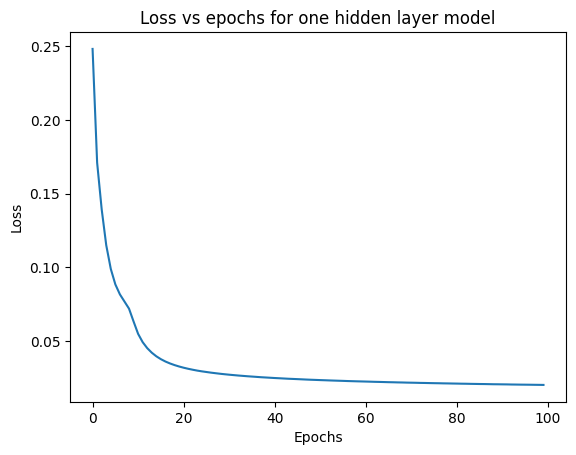

In [23]:
plt.plot(history.history['loss'])   ## Plot of loss with epoch
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs epochs for one hidden layer model")

In [24]:
### model2 with 2 hidden layer 

In [25]:
model2=Sequential()
model2.add(Dense(7,activation='sigmoid',input_dim=12))
model2.add(Dense(3,activation='sigmoid'))
model2.add(Dense(1,activation='sigmoid'))

/Users/a0s0iro/PycharmProjects/AI-DSE_MTECH/pythonvenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 7)              │            91 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119 (476.00 B)

 Trainable params: 119 (476.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
model2.compile(loss='binary_crossentropy',optimizer='Adam')

In [28]:
history2=model2.fit(X_train_scaled,y_train,epochs=50,verbose=2)

Epoch 1/50
11021/11021 - 2s - 209us/step - loss: 0.2056
Epoch 2/50
11021/11021 - 2s - 188us/step - loss: 0.0912
Epoch 3/50
11021/11021 - 2s - 188us/step - loss: 0.0756
Epoch 4/50
11021/11021 - 2s - 187us/step - loss: 0.0625
Epoch 5/50
11021/11021 - 2s - 186us/step - loss: 0.0523
Epoch 6/50
11021/11021 - 2s - 186us/step - loss: 0.0463
Epoch 7/50
11021/11021 - 2s - 185us/step - loss: 0.0425
Epoch 8/50
11021/11021 - 2s - 186us/step - loss: 0.0397
Epoch 9/50
11021/11021 - 2s - 187us/step - loss: 0.0375
Epoch 10/50
11021/11021 - 2s - 185us/step - loss: 0.0358
Epoch 11/50
11021/11021 - 2s - 187us/step - loss: 0.0343
Epoch 12/50
11021/11021 - 2s - 184us/step - loss: 0.0330
Epoch 13/50
11021/11021 - 2s - 183us/step - loss: 0.0318
Epoch 14/50
11021/11021 - 2s - 184us/step - loss: 0.0309
Epoch 15/50
11021/11021 - 2s - 184us/step - loss: 0.0300
Epoch 16/50
11021/11021 - 2s - 184us/step - loss: 0.0293
Epoch 17/50
11021/11021 - 2s - 185us/step - loss: 0.0286
Epoch 18/50
11021/11021 - 2s - 183us/ste

In [29]:
predicted=model2.predict(X_test_scaled)

2756/2756 ━━━━━━━━━━━━━━━━━━━━ 0s 147us/step


In [30]:
y_pred=np.where(predicted>0.5,1,0)
print("Accuracy with 2 hidden layer:-",accuracy_score(y_pred=y_pred,y_true=y_test))

Accuracy with 2 hidden layer:- 0.9943629702723241


Text(0.5, 1.0, 'Loss vs epochs for 2 hidden layer model')

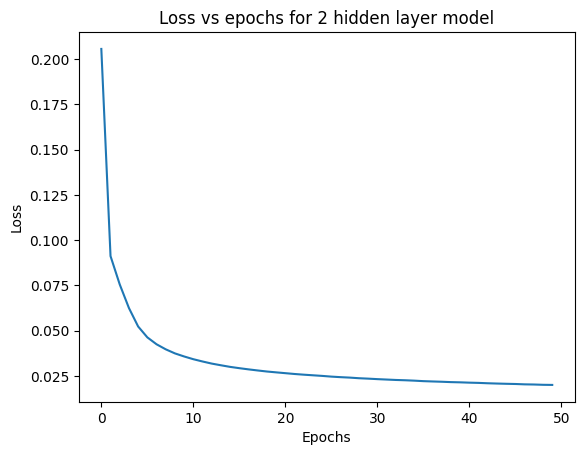

In [31]:
plt.plot(history2.history['loss'])   ## Plot of loss with epoch
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs epochs for 2 hidden layer model")